#Lending Club Case Study

In [1]:
#Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read data file provided - loan.csv
df=pd.read_csv("loan.csv")

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
df.shape

(39717, 111)

In [7]:
##check how much data has more than 70% of null values in the columns and remove. Consider only the remaining for further analysis

df1=df[df.columns[(df.isnull().sum())/len(df) < 0.3]]

In [8]:
df1.shape

(39717, 53)

In [9]:
#Further consider columns only that are required for the analysis
df2=df1[["loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title",
        "emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","purpose","addr_state","dti",
        "out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv"]]

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_title            37258 non-null  object 
 9   emp_length           38642 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  pymnt_plan           39717 non-null 

In [11]:
df2.shape

(39717, 23)

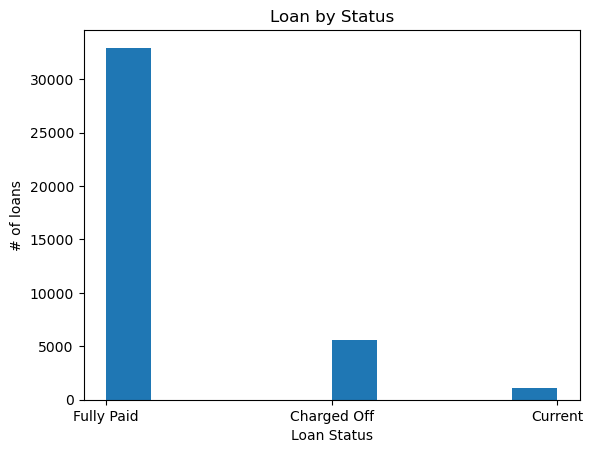

In [12]:
# Analyse Categorical Target variable - loan_status
plt.hist(df2["loan_status"])
plt.xlabel("Loan Status")
plt.ylabel("# of loans")
plt.title("Loan by Status")
plt.show()

In [13]:
# Consider rows where loan status is Fully Paid or Charged Off. Remove records with Current status as it is not relevant for this analysis
loan_dtls_df=df2[df2["loan_status"].isin(["Fully Paid","Charged Off"])]

In [14]:
loan_dtls_df.shape

(38577, 23)

In [15]:
#Create a new column and assign 1 to Fully Paid and 0 to Charged Off Status
loan_dtls_df["loan_status_c"] = loan_dtls_df["loan_status"].apply(lambda x: 1 if x=="Fully Paid" else 0)

In [16]:
loan_dtls_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_title            36191 non-null  object 
 9   emp_length           37544 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  pymnt_plan           38577 non-null  obje

In [17]:
#int_rate - Remove % and convert the type to float
loan_dtls_df["int_rate"]=loan_dtls_df["int_rate"].str.replace('%','').astype("float64")

In [18]:
#Trim blank characters in Term column
loan_dtls_df["term"] = loan_dtls_df["term"].str.strip()

In [19]:
#Create a new column emp_tenure to store the employment lenght proivded.
# for this < 1 Year will be considered as 0, 10+ Years will be conisdered as 10 and na will be replaced with a value 99 from the analysis

In [20]:
loan_dtls_df["emp_tenure"] = loan_dtls_df["emp_length"].astype(str).str[:2]
loan_dtls_df["emp_tenure"] = loan_dtls_df["emp_tenure"].str.replace("na","99")
loan_dtls_df["emp_tenure"] = loan_dtls_df["emp_tenure"].str.replace("<","0")
loan_dtls_df["emp_tenure"] = loan_dtls_df["emp_tenure"].str.replace(" ","").astype("int64")


In [21]:
loan_dtls_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  float64
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_title            36191 non-null  object 
 9   emp_length           37544 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  pymnt_plan           38577 non-null  obje

In [22]:
loan_dtls_df.shape

(38577, 25)

In [23]:
#Create a new column issue_year to store year values from issue_d column
loan_dtls_df["issue_year"] = pd.to_datetime(loan_dtls_df["issue_d"],format='%b-%y')
loan_dtls_df["issue_year"]= loan_dtls_df["issue_year"].apply(lambda x: x.year)

In [24]:
loan_dtls_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,purpose,addr_state,dti,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,loan_status_c,emp_tenure,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,credit_card,AZ,27.65,0.0,0.0,5863.155187,5833.84,1,10,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,car,GA,1.00,0.0,0.0,1008.710000,1008.71,0,0,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,small_business,IL,8.72,0.0,0.0,3005.666844,3005.67,1,10,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,other,CA,20.00,0.0,0.0,12231.890000,12231.89,1,10,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,wedding,AZ,11.20,0.0,0.0,5632.210000,5632.21,1,3,2011


In [25]:
loan_dtls_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  float64
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_title            36191 non-null  object 
 9   emp_length           37544 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  pymnt_plan           38577 non-null  obje

In [27]:
#Data Visualization using Univariate and Bi/Multi-variate Analysis

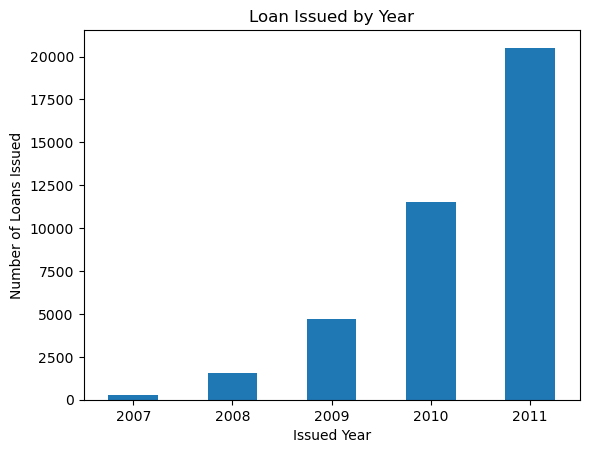

In [28]:
#Number of loans issued by year
#As is clear from the chart, loans issued by Lending Club has been on an increasing trend over the years
ax=loan_dtls_df["issue_year"].value_counts(ascending=True).plot(kind="bar")

plt.xlabel("Issued Year")
plt.ylabel("Number of Loans Issued")
plt.title("Loan Issued by Year")
plt.xticks(rotation='horizontal')
plt.show()

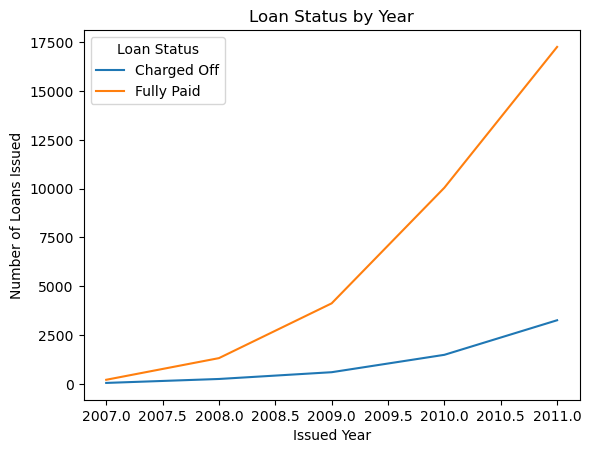

In [29]:
# Number of people defaulting per year
#From the chart, we observe that number of defaulters are also on the rise over the years.
result = loan_dtls_df.groupby(by=['issue_year','loan_status']).size().reset_index()
result.rename(columns={0:"count"}, inplace=True)
result.set_index(["issue_year","loan_status"])['count'].unstack().plot.line()

plt.rcParams['figure.figsize'] = [7,6]
plt.xlabel("Issued Year")
plt.ylabel("Number of Loans Issued")
plt.title("Loan Status by Year")
plt.legend().set_title('Loan Status')
plt.xticks(rotation='horizontal')
plt.show()

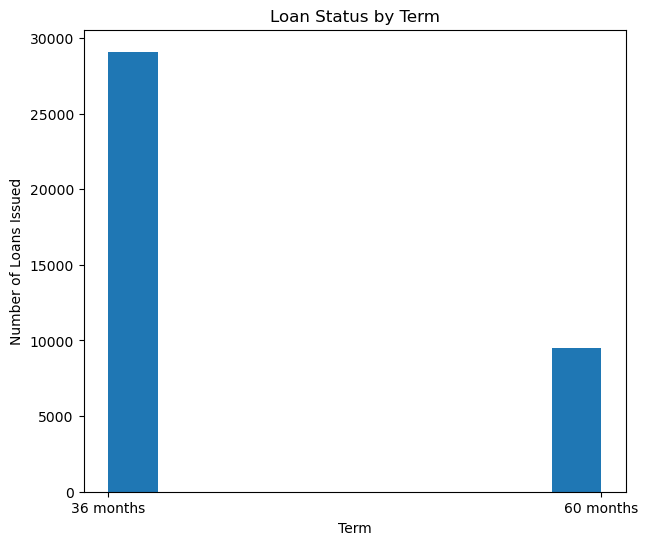

In [30]:
#Term vs Loan applications
#Seems the number of loans taken are more for 36 months.
plt.hist(loan_dtls_df["term"])
plt.xlabel("Term")
plt.ylabel("Number of Loans Issued")
plt.title("Loan Status by Term")
plt.xticks(rotation='horizontal')
plt.show()
plt.show()

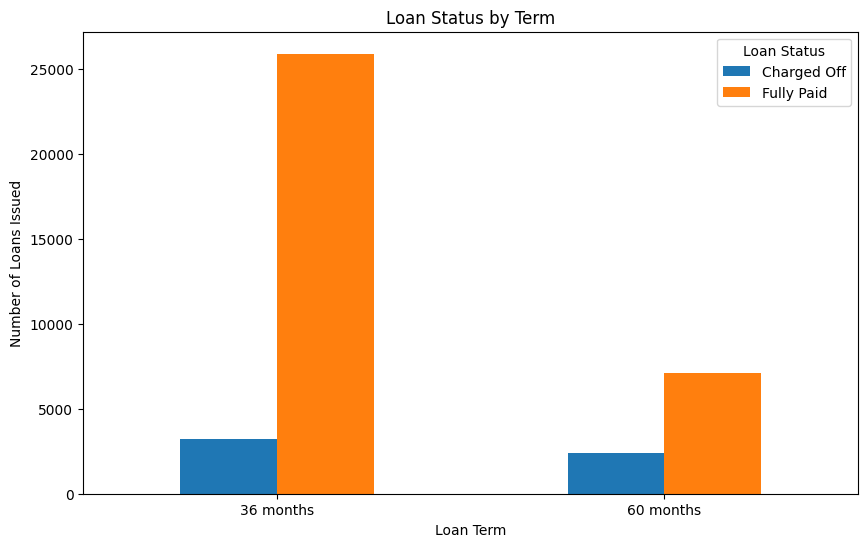

In [ ]:
#Find loan status by Term
#From the chart, we observe that the default rate is higher for the 36 months bucket.
result = loan_dtls_df.groupby(by=['term','loan_status']).size().reset_index()
result.rename(columns={0:"count"}, inplace=True)
result.set_index(["term","loan_status"])['count'].unstack().plot.bar()

plt.xlabel("Loan Term")
plt.ylabel("Number of Loans Issued")
plt.title("Loan Status by Term")
plt.legend().set_title('Loan Status')
plt.xticks(rotation='horizontal')
plt.show()

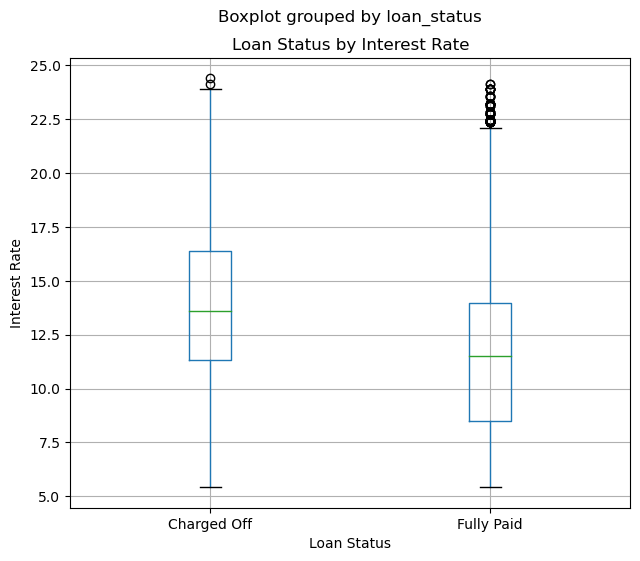

In [31]:
#Find loan status by Interest Rate
#It seems people who are defaulting are already on an higher interest rate compared to the ones that have fully paid.
loan_dtls_df.boxplot(column="int_rate",by="loan_status")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")
plt.title("Loan Status by Interest Rate")
plt.show()

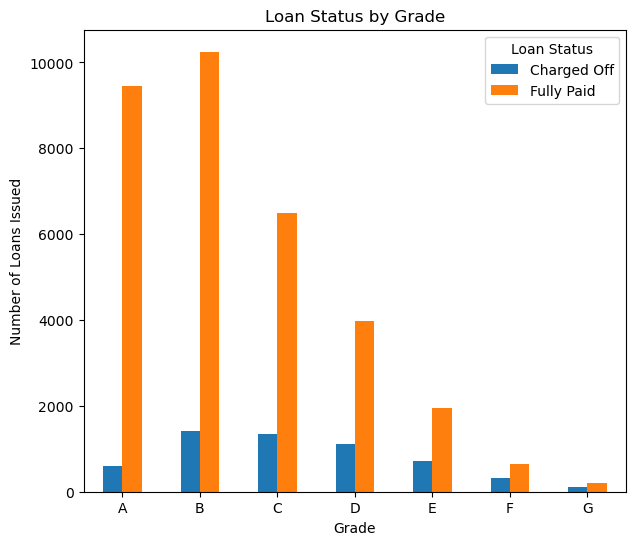

In [32]:
#Find loan status by Grade
#From the chart, it seems people classified under grade B have defaulted more on the loans than other categories
result = loan_dtls_df.groupby(by=['grade','loan_status']).size().reset_index()
result.rename(columns={0:"count"}, inplace=True)
result.set_index(["grade","loan_status"])['count'].unstack().plot.bar()

plt.xlabel("Grade")
plt.ylabel("Number of Loans Issued")
plt.title("Loan Status by Grade")
plt.legend().set_title('Loan Status')
plt.xticks(rotation='horizontal')
plt.show()

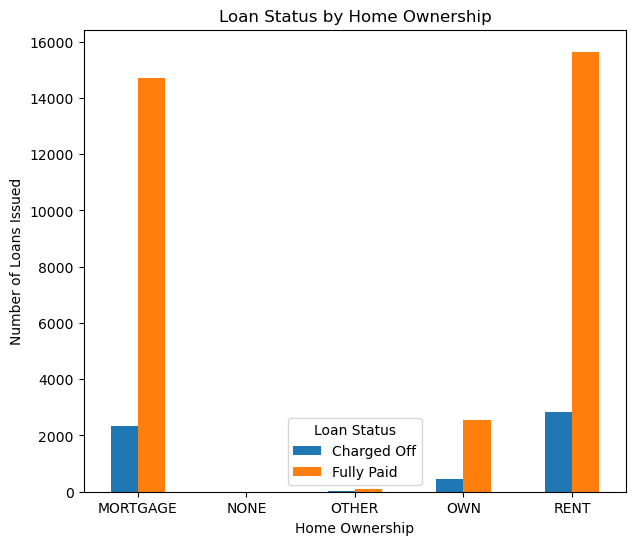

In [33]:
#Find loan status by Home Ownership
#From the chart, it is clear that People who are living in Rental accomodation is more likely to default on the loans closely followed by those who mortgaged
result = loan_dtls_df.groupby(by=['home_ownership','loan_status']).size().reset_index()
result.rename(columns={0:"count"}, inplace=True)
result.set_index(["home_ownership","loan_status"])['count'].unstack().plot.bar()

plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans Issued")
plt.title("Loan Status by Home Ownership")
plt.legend().set_title('Loan Status')
plt.xticks(rotation='horizontal')
plt.show()

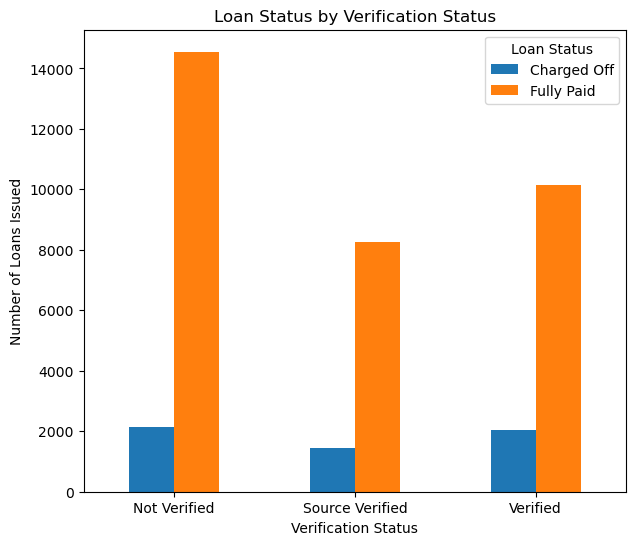

In [34]:
#Find loan status by Verification Status
#People in the Source Verified category default on the loan lesser that those that are on Verified and Not Verified
result = loan_dtls_df.groupby(by=['verification_status','loan_status']).size().reset_index()
result.rename(columns={0:"count"}, inplace=True)
result.set_index(["verification_status","loan_status"])['count'].unstack().plot.bar()

plt.xlabel("Verification Status")
plt.ylabel("Number of Loans Issued")
plt.title("Loan Status by Verification Status")
plt.legend().set_title('Loan Status')
plt.xticks(rotation='horizontal')
plt.show()

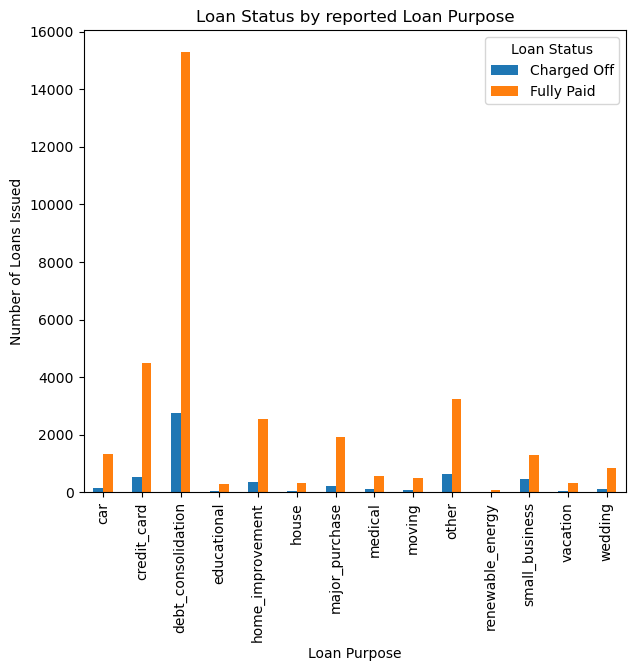

In [35]:
#Find loan status by Purpose of Loan
#People who stated debt consolidation as the reason to buy a loan are also the ones that have defaulted the most.
result = loan_dtls_df.groupby(by=['purpose','loan_status']).size().reset_index()
result.rename(columns={0:"count"}, inplace=True)
result.set_index(["purpose","loan_status"])['count'].unstack().plot.bar()

plt.xlabel("Loan Purpose")
plt.ylabel("Number of Loans Issued")
plt.title("Loan Status by reported Loan Purpose")
plt.legend().set_title('Loan Status')
plt.xticks(rotation='vertical')
plt.show()

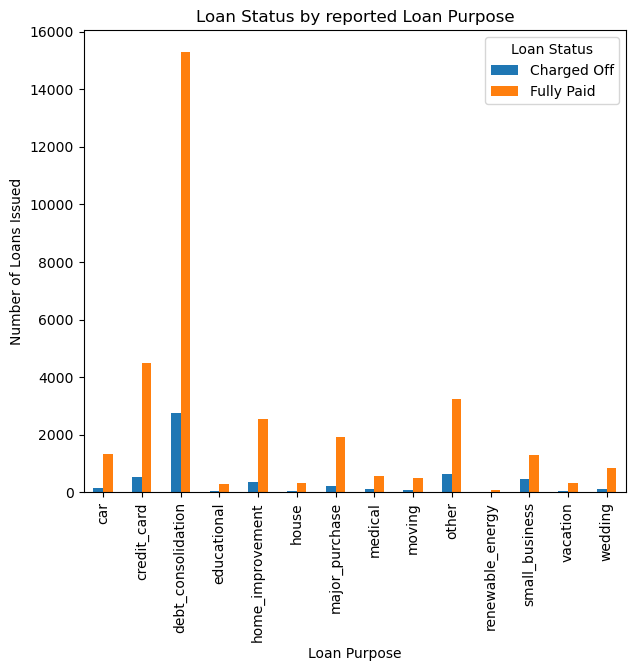

In [36]:
#Find loan status by Purpose of Loan
#People who stated debt consolidation as the reason to buy a loan are also the ones that have defaulted the most.
result = loan_dtls_df.groupby(by=['purpose','loan_status']).size().reset_index()
result.rename(columns={0:"count"}, inplace=True)
result.set_index(["purpose","loan_status"])['count'].unstack().plot.bar()

plt.xlabel("Loan Purpose")
plt.ylabel("Number of Loans Issued")
plt.title("Loan Status by reported Loan Purpose")
plt.legend().set_title('Loan Status')
plt.xticks(rotation='vertical')
plt.show()

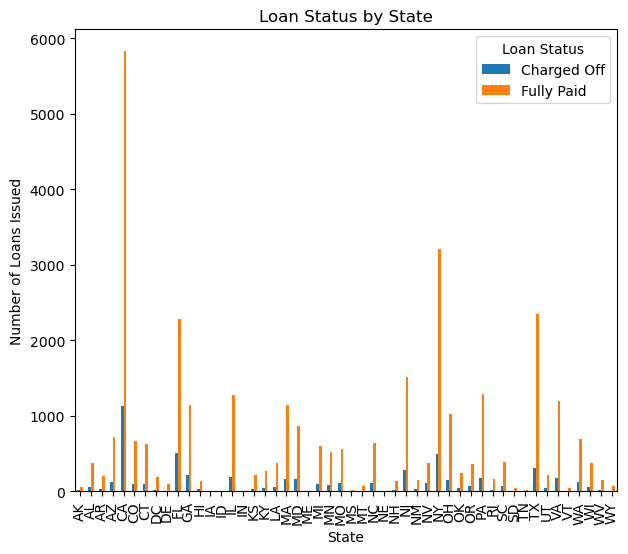

In [37]:
#Find loan status by Demographics
#From the chart, we observe people residing in the state of CA are the ones that most default on their loans. It is followed by states - FL and NY.
result = loan_dtls_df.groupby(by=['addr_state','loan_status']).size().reset_index()
result.rename(columns={0:"count"}, inplace=True)
result.set_index(["addr_state","loan_status"])['count'].unstack().plot.bar()

plt.rcParams['figure.figsize'] = [10,6]
#fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel("State")
plt.ylabel("Number of Loans Issued")
plt.title("Loan Status by State")
plt.legend().set_title('Loan Status')
plt.xticks(rotation='vertical')
plt.show()

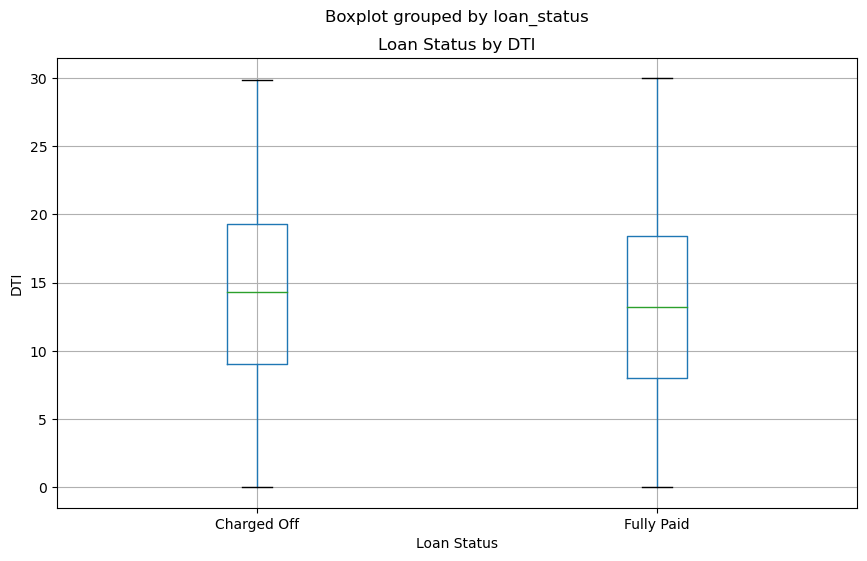

In [38]:
#Find loan status by dti
#It seems from the box plot figure below that the defaults are having a higher dti compared to those that have paid off the loan
loan_dtls_df.boxplot(column="dti",by="loan_status")
plt.xlabel("Loan Status")
plt.ylabel("DTI")
plt.title("Loan Status by DTI")
plt.show()

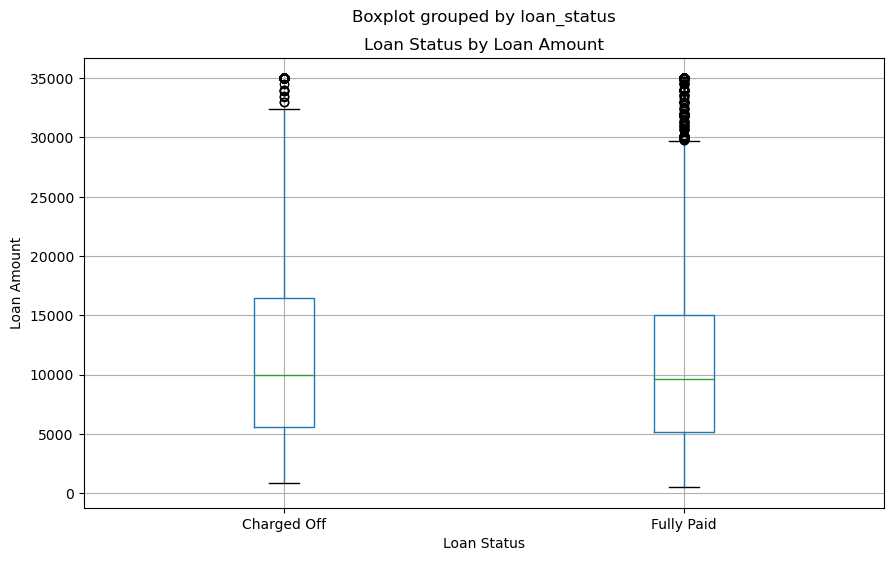

In [41]:
#Find loan status by Loan Amount
#It seems people who are defaulting are already on an higher interest rate compared to the ones that have fully paid.

#loan_dtls_df["loan_amnt"].describe()
loan_dtls_df.boxplot(column="loan_amnt",by="loan_status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.title("Loan Status by Loan Amount")
plt.show()